<a href="https://colab.research.google.com/github/itsmrx1234/webscraping/blob/main/WebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing everything

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

# Getting the whole data

In [ ]:
headers = {
    'User-Agent' : 'Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-G973U) AppleWebKit/537.36 (KHTML, like Gecko) SamsungBrowser/14.2 Chrome/87.0.4280.141 Mobile Safari/537.36'}
webpage = requests.get('https://www.ambitionbox.com/list-of-companies?page=1', headers=headers).text

In [ ]:
soup =  BeautifulSoup(webpage, 'lxml')

In [ ]:
companies = soup.find_all('div', class_= 'companyCardWrapper')

In [ ]:
names=[]
ratings=[]
reviews=[]
ctypes=[]
locations=[]
employees=[]

# Scraping the data

In [ ]:
for company in companies:
    name_tag = company.find('h2', class_='companyCardWrapper__companyName')
    company_name = name_tag.text.strip() if name_tag else "No Name"

    rating_wrapper = company.find('div', class_='rating_text')
    if rating_wrapper:
        rating_text = rating_wrapper.find_next('div')
        rating = rating_text.text.strip() if rating_text else "No Rating"
    else:
        rating = "No Rating"


    about = company.find('span', class_='companyCardWrapper__interLinking')
    if about:
        about_text = about.text.strip().split('|')  # Split based on '|'
        c_type = about_text[0].strip() if len(about_text) > 0 else "No Type"
        location = about_text[1].strip().split(' ')[0] if len(about_text) > 1 else "No Location"
    else:
        c_type = "No Type"
        location = "No Location"

    review_tag = company.find('span', class_='companyCardWrapper__companyRatingCount')
    review = review_tag.text.strip()[1:-2] + 'k' if review_tag else "No Review"

    names.append(company_name)
    ratings.append(rating)
    ctypes.append(c_type)
    locations.append(location)
    reviews.append(review)

    print(f"Company: {company_name}, Rating: {rating}, Type: {c_type}, Location: {location}, Review: {review}")

Company: TCS, Rating: 3.7, Type: IT Services & Consulting, Location: Bangalore, Review: 92.2k
Company: Accenture, Rating: 3.8, Type: IT Services & Consulting, Location: Bangalore, Review: 58.2k
Company: Wipro, Rating: 3.7, Type: IT Services & Consulting, Location: Bangalore, Review: 54.4k
Company: Cognizant, Rating: 3.7, Type: IT Services & Consulting, Location: Chennai, Review: 51.6k
Company: Capgemini, Rating: 3.7, Type: IT Services & Consulting, Location: Bangalore, Review: 43k
Company: HDFC Bank, Rating: 3.9, Type: Banking, Location: Mumbai, Review: 40.7k
Company: Infosys, Rating: 3.6, Type: IT Services & Consulting, Location: Bangalore, Review: 40.5k
Company: ICICI Bank, Rating: 4.0, Type: Banking, Location: Mumbai, Review: 39k
Company: HCLTech, Rating: 3.5, Type: IT Services & Consulting, Location: Chennai, Review: 37.2k
Company: Tech Mahindra, Rating: 3.5, Type: IT Services & Consulting, Location: Hyderabad, Review: 36.1k
Company: Genpact, Rating: 3.8, Type: IT Services & Consul

#Storing it in the dataframe

In [ ]:
df = pd.DataFrame({'Name': names, 'Rating': ratings, 'Type': ctypes, 'Location': locations, 'Reviews': reviews})

In [ ]:
df

,Name,Rating,Type,Location,Reviews
0,TCS,3.7,IT Services & Consulting,Bangalore,92.2k
1,Accenture,3.8,IT Services & Consulting,Bangalore,58.2k
2,Wipro,3.7,IT Services & Consulting,Bangalore,54.4k
3,Cognizant,3.7,IT Services & Consulting,Chennai,51.6k
4,Capgemini,3.7,IT Services & Consulting,Bangalore,43k
5,HDFC Bank,3.9,Banking,Mumbai,40.7k
6,Infosys,3.6,IT Services & Consulting,Bangalore,40.5k
7,ICICI Bank,4.0,Banking,Mumbai,39k
8,HCLTech,3.5,IT Services & Consulting,Chennai,37.2k
9,Tech Mahindra,3.5,IT Services & Consulting,Hyderabad,36.1k


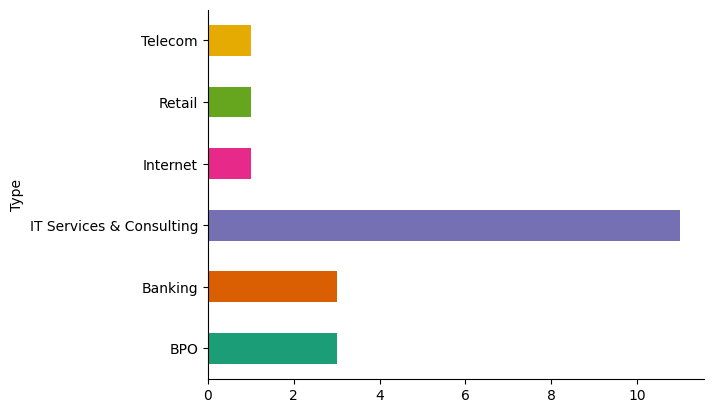

In [ ]:
# @title Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)